In [1]:
# @title Libraries

import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

import pymannkendall as mk

import datetime

In [2]:
# @title Data sets
# Upload DDAll.csv, DDC1620[ALL].csv, DDPandemic.csv if not already in Colab Files
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()



In [3]:
# @title Download fonts
!wget 'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Light.ttf'
!wget 'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Regular.ttf'
!wget 'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Medium.ttf'
!wget 'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Bold.ttf'

--2025-11-07 16:57:23--  https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Light.ttf
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/openmaptiles/fonts/master/roboto/Roboto-Light.ttf [following]
--2025-11-07 16:57:24--  https://raw.githubusercontent.com/openmaptiles/fonts/master/roboto/Roboto-Light.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162420 (159K) [application/octet-stream]
Saving to: ‘Roboto-Light.ttf.3’

Roboto-Light.ttf.3  100%[===================>] 158.61K  --.-KB/s    in 0.01s   

2025-11-07 16:57:24 (11.7 MB/s) - ‘Roboto-Light.ttf.3’ saved [162420/162420]

--20

In [4]:
# @title Typesetting
# https://stackoverflow.com/a/65841091
from matplotlib import font_manager as fm, pyplot as plt

font_files = fm.findSystemFonts('.')

# Install fonts
for font_file in font_files:
  fm.fontManager.addfont(font_file)

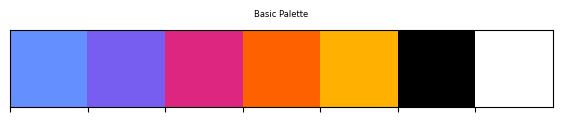

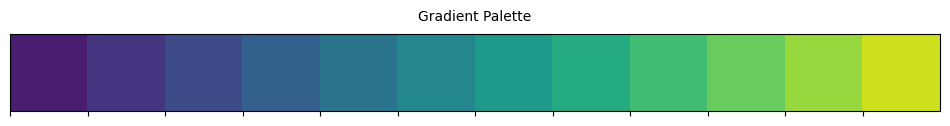

In [5]:
# @title Colors
colors = ["#648FFF", "#785EF0", "#DC267F", "#FE6100", "#FFB000", "#000000", "#FFFFFF"]
colors_grad = sns.color_palette('viridis',  12)
colors_heat1 = sns.color_palette('viridis', as_cmap=True)

color_bg = "#1B181C"
color_text = "#FFFFFF"


sns.palplot(colors)
plt.gca().set_title('Basic Palette', fontsize=6, pad=10)

sns.palplot(colors_grad)
plt.gca().set_title('Gradient Palette', fontsize=10, pad=10)

plt.show()

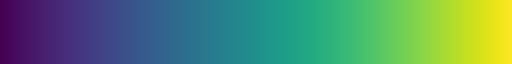

In [6]:
# Heatmap Palette (1-way)
colors_heat1

In [7]:
# @title Plot settings
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams["figure.figsize"] = 16,8

# Text
mpl.rcParams['font.family'] = 'Roboto'

# Title
mpl.rcParams['figure.titlesize'] = 22
mpl.rcParams['axes.titlesize'] = 22
mpl.rcParams['axes.titleweight'] = 'bold'

# Labels
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

# Spacing
mpl.rcParams['axes.titlepad'] = 72
mpl.rcParams['axes.labelpad'] = 10
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.pad'] = 10
mpl.rcParams['xtick.major.width'] = 0
mpl.rcParams['xtick.minor.width'] = 0
mpl.rcParams['ytick.major.width'] = 0
mpl.rcParams['ytick.minor.width'] = 0

# Spines and grids
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

# Legends
mpl.rcParams['legend.title_fontsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.frameon'] = False

# Bars
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

# Colors
mpl.rcParams["figure.facecolor"] = color_bg
mpl.rcParams["axes.facecolor"] = color_bg
mpl.rcParams["savefig.facecolor"] = color_bg

# Text colors
mpl.rcParams['text.color'] = color_text
mpl.rcParams['axes.labelcolor'] = color_text
mpl.rcParams['xtick.color'] = color_text
mpl.rcParams['ytick.color'] = color_text

# Line colors
mpl.rcParams['axes.edgecolor'] = color_text

## Mann-Kendall Analysis

Mann-Kendall Test Results
Trend:  increasing
Trend Presence:  True
p-value: 1.112e-07
normalized test statistic: 5.307
Kendell Tau: 0.484
Mann-Kendell Score: 772.000
Variance S: 21102.667
Theil-Sen Slope: 428.353
Intercept of Kendall-Theil Robust Line: 5565.103


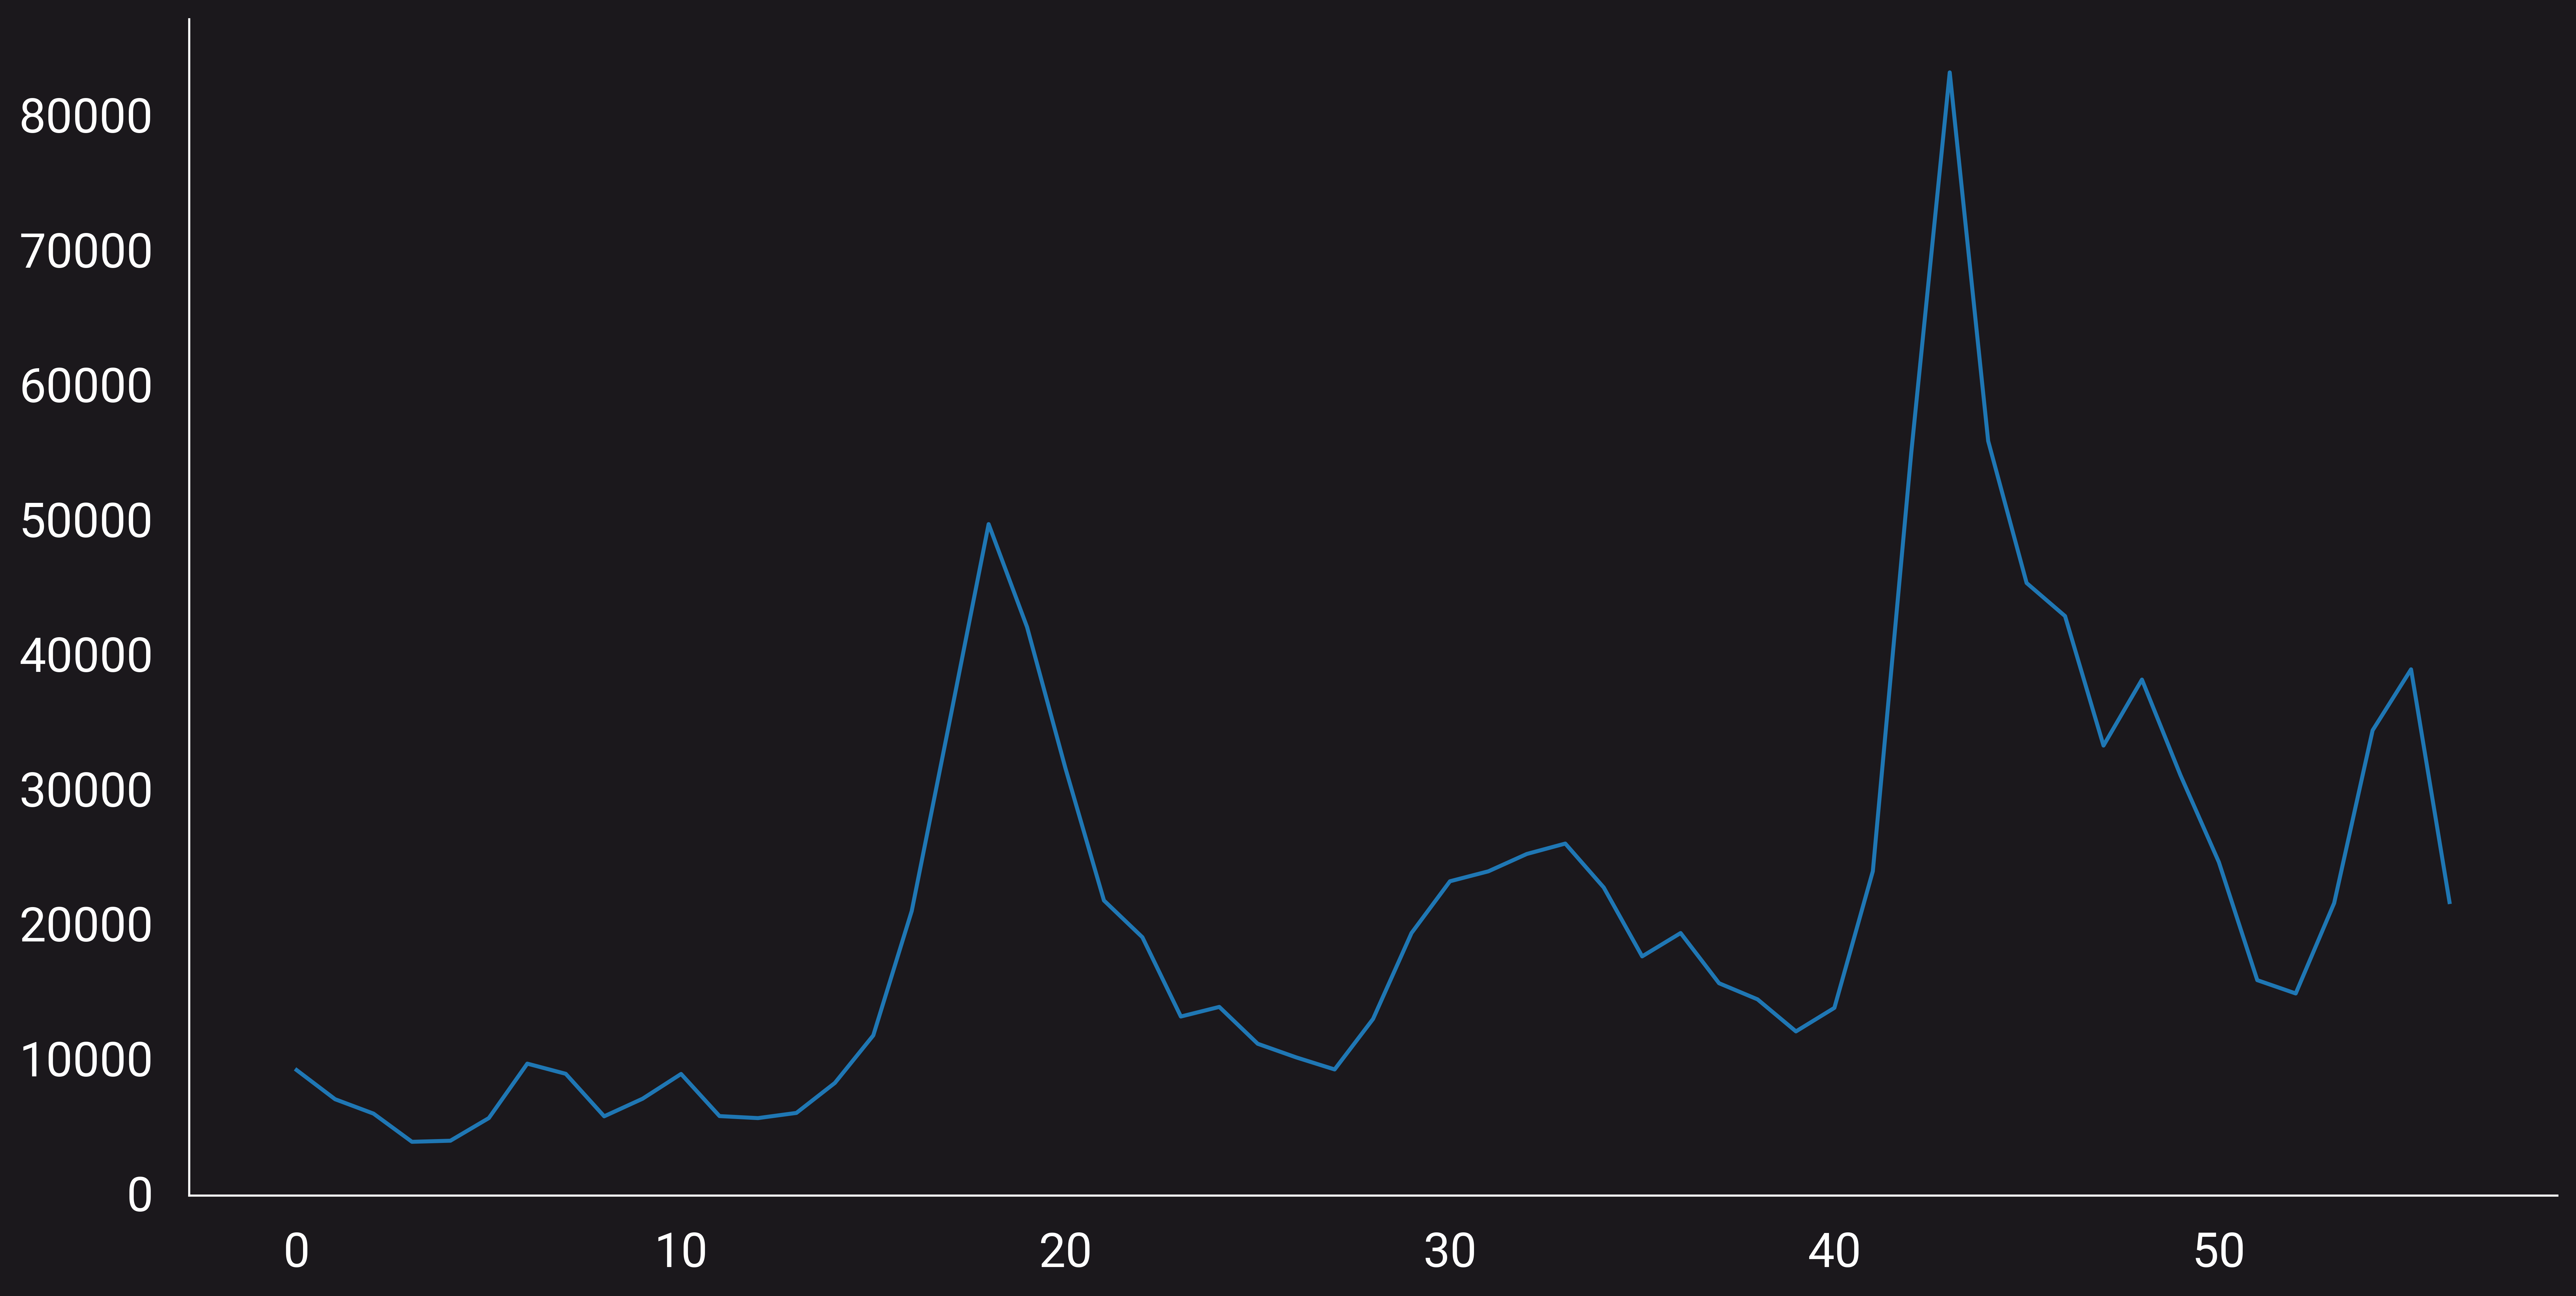

In [8]:
df = uploaded
path = "/content/DDAll.csv"
df = pd.read_csv(path)

df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

case_res = mk.original_test(df['Cases'])
print("Mann-Kendall Test Results")
print("Trend: ",case_res.trend)
print("Trend Presence: ",case_res.h)
print("p-value: {:.3e}".format(case_res.p))
print("normalized test statistic: {:.3f}".format(case_res.z))
print("Kendell Tau: {:.3f}".format(case_res.Tau))
print("Mann-Kendell Score: {:.3f}".format(case_res.s))
print("Variance S: {:.3f}".format(case_res.var_s))
print("Theil-Sen Slope: {:.3f}".format(case_res.slope))
print("Intercept of Kendall-Theil Robust Line: {:.3f}".format(case_res.intercept))
plt.plot(df['Cases'])





## New Dengue Cases per Month (2021 - 2025)

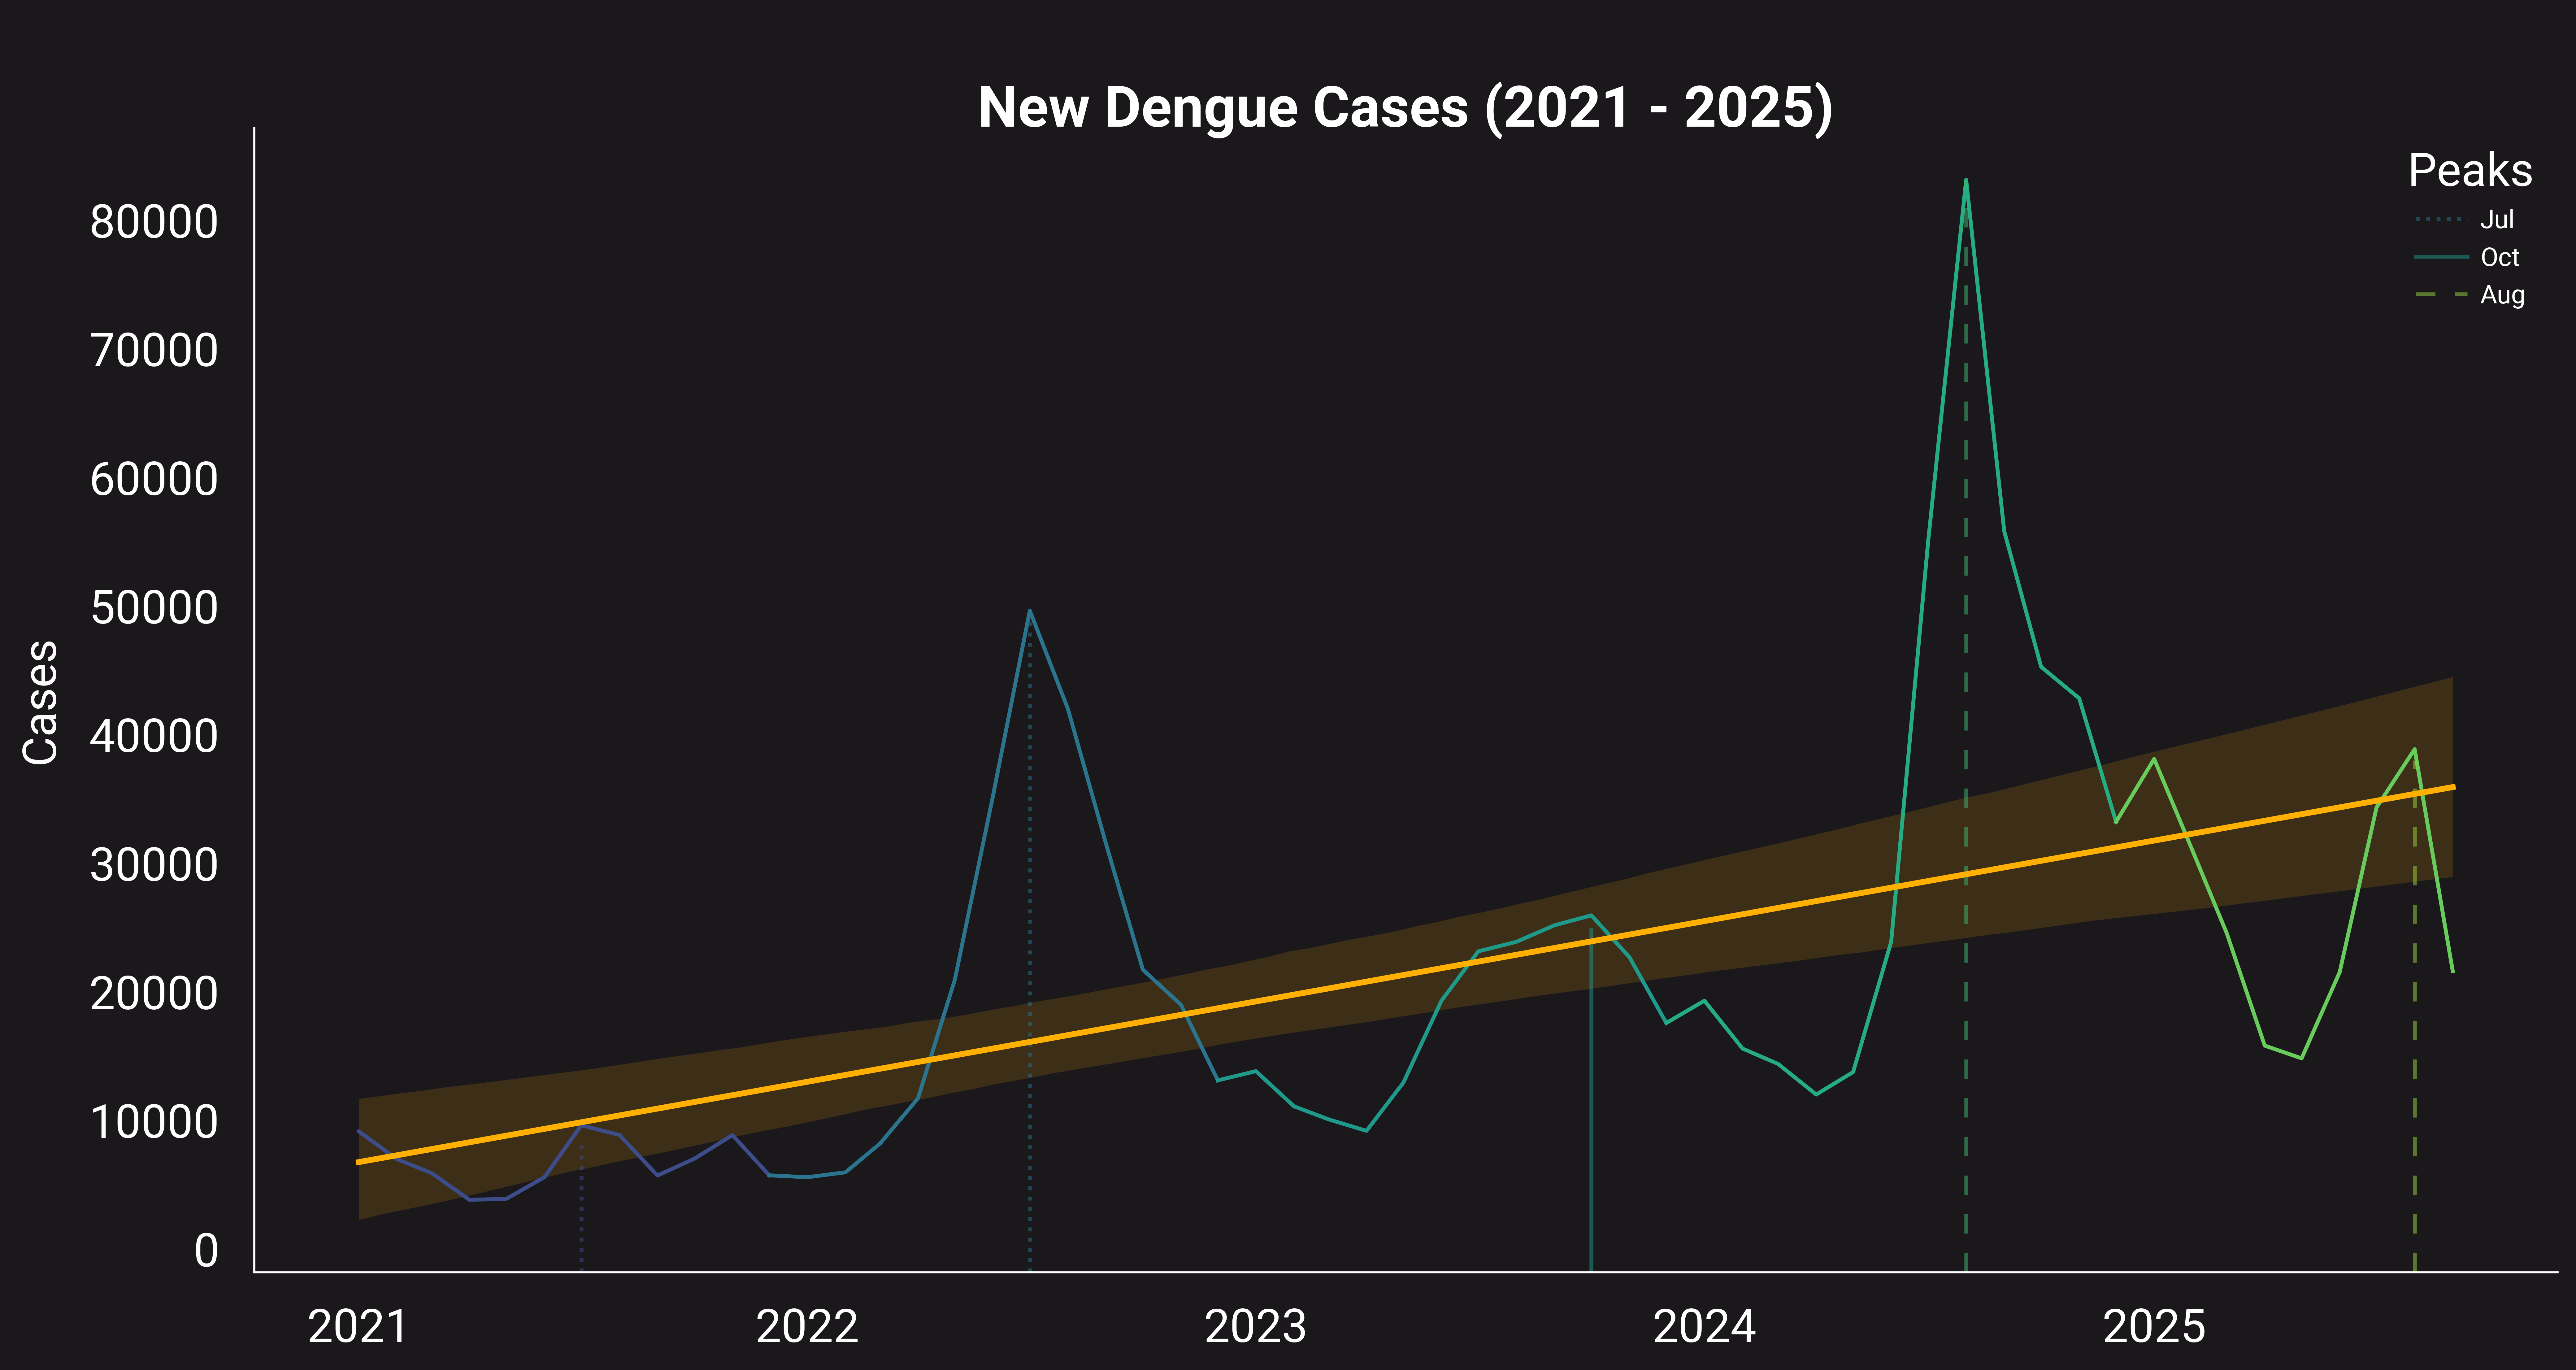

<Figure size 1920x1080 with 0 Axes>

In [9]:

path = "/content/DDAll.csv"
df = pd.read_csv(path)

df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

f, ax = plt.subplots(figsize=(16, 8))

# sns.lineplot(data=df, x='date', y='Cases', ax=ax, color=colors[0]) # monotone plot

# Plot Monthly data per Year
for c, y in zip(range(df['Year'].nunique()), df['Year'].unique()):
  idx = df.index[df['Year'] == y].tolist()
  if min(idx)-1 > 0: idx.insert(0, min(idx)-1)
  df_y = df.iloc[idx]
  sns.lineplot(data=df_y, x='date', y='Cases',
               ax=ax, color=colors_grad[round(c*1.8)+2], legend=False)

# Plot peaks per Year
msk = df.groupby(['Year'])['Cases'].transform('max') == df['Cases']
peak_dates = df.loc[msk, ['Cases', 'Month', 'date']]
for index, row in peak_dates.iterrows():
  height = ax.get_ylim()[1]-ax.get_ylim()[0]
  m, x, y = row['Month'], row['date'], (row['Cases']-ax.get_ylim()[0])/height


  if m == 7:
    ax.axvline(x=x, ymax=y, color=colors_grad[round(index*1.8)//12+2], linestyle=':', alpha=0.5, label='Jul')
  elif m == 8:
    ax.axvline(x=x, ymax=y, color=colors_grad[round(index*1.8)//12+2], linestyle='dashed', dashes=(5, 5), alpha=0.5, label='Aug')
  elif m == 10:
    ax.axvline(x=x, ymax=y, color=colors_grad[round(index*1.8)//12+2], linestyle='solid', alpha=0.5, label='Oct')


# Plot regression line
df['date_reg'] = mpl.dates.date2num(df['date']) # regplot does not work with timestamps
sns.regplot(data=df, x='date_reg', y='Cases', order=1,
            ax=ax, scatter=False, color=colors[4])


# Add titles, labels, and legends
ax.set(xlabel=None, ylabel='Cases')
ax.set_title('\nNew Dengue Cases (2021 - 2025)', pad=0.5, y= 1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize = 'medium',
           facecolor=color_bg, framealpha=0.8, frameon=True, handletextpad=0.5, title='Peaks')
plt.figure(figsize=[19.20,10.80],dpi=100)



plt.show()


## New Dengue Cases per Month (2016 - 2020)

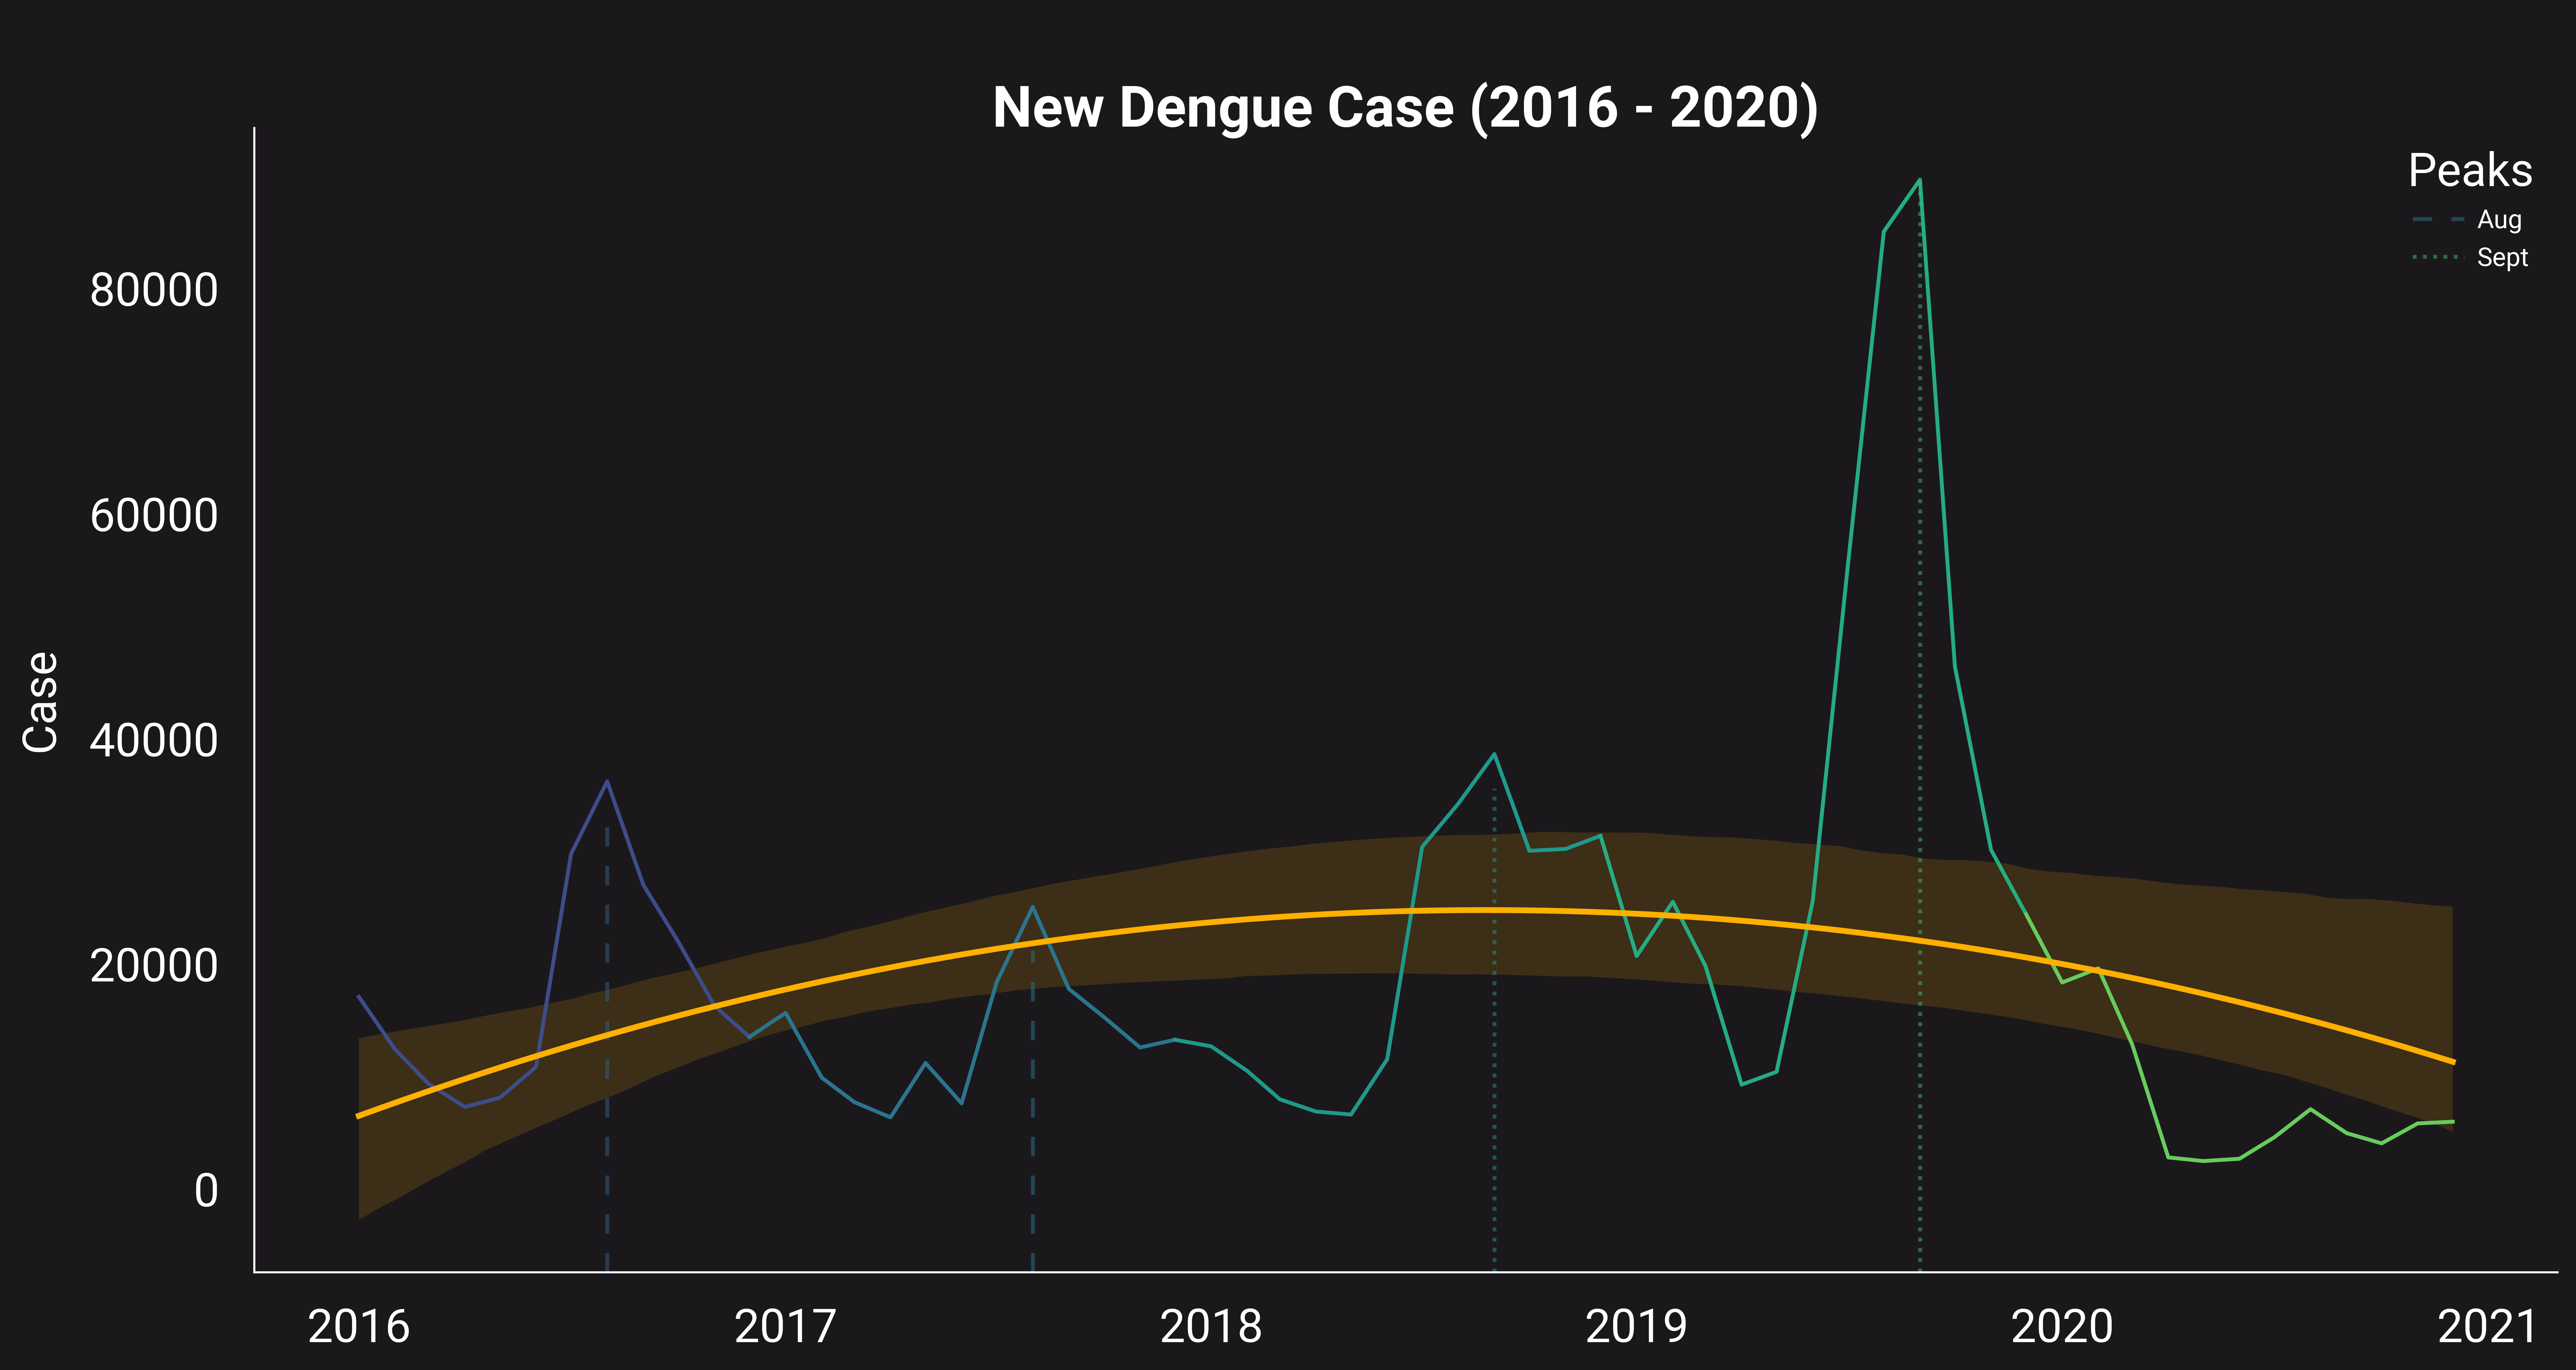

<Figure size 1920x1080 with 0 Axes>

In [10]:

path = "/content/DDC1620[ALL].csv"
df = pd.read_csv(path)

df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

f, ax = plt.subplots(figsize=(16, 8))

# sns.lineplot(data=df, x='date', y='Case', ax=ax, color=colors[0]) # monotone plot

# Plot Monthly data per Year
for c, y in zip(range(df['Year'].nunique()), df['Year'].unique()):
  idx = df.index[df['Year'] == y].tolist()
  if min(idx)-1 > 0: idx.insert(0, min(idx)-1)
  df_y = df.iloc[idx]
  sns.lineplot(data=df_y, x='date', y='Case',
               ax=ax, color=colors_grad[round(c*1.8)+2], legend=False)

# Plot peaks per Year
msk = df.groupby(['Year'])['Case'].transform('max') == df['Case']
peak_dates = df.loc[msk, ['Case', 'Month', 'date']]
for index, row in peak_dates.iterrows():
  height = ax.get_ylim()[1]-ax.get_ylim()[0]
  m, x, y = row['Month'], row['date'], (row['Case']-ax.get_ylim()[0])/height


  if m == 7:
    ax.axvline(x=x, ymax=y, color=colors_grad[round(index*1.8)//12+2], linestyle=':', alpha=0.5, label='Jul')
  elif m == 8:
    ax.axvline(x=x, ymax=y, color=colors_grad[round(index*1.8)//12+2], linestyle='dashed', dashes=(5, 5), alpha=0.5, label='Aug')
  if m == 9:
    ax.axvline(x=x, ymax=y, color=colors_grad[round(index*1.8)//12+2], linestyle=':', alpha=0.5, label='Sept')
  elif m == 10:
    ax.axvline(x=x, ymax=y, color=colors_grad[round(index*1.8)//12+2], linestyle='solid', alpha=0.5, label='Oct')


# Plot regression line
df['date_reg'] = mpl.dates.date2num(df['date']) # regplot does not work with timestamps
sns.regplot(data=df, x='date_reg', y='Case', order=2,
            ax=ax, scatter=False, color=colors[4])


# Add titles, labels, and legends
ax.set(xlabel=None, ylabel='Case')
ax.set_title('\nNew Dengue Case (2016 - 2020)', pad=0.5, y= 1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize = 'medium',
           facecolor=color_bg, framealpha=0.8, frameon=True, handletextpad=0.5, title='Peaks')
plt.figure(figsize=[19.20,10.80],dpi=100)



plt.show()


## New Dengue Cases per Month (Pandemic Comparison)

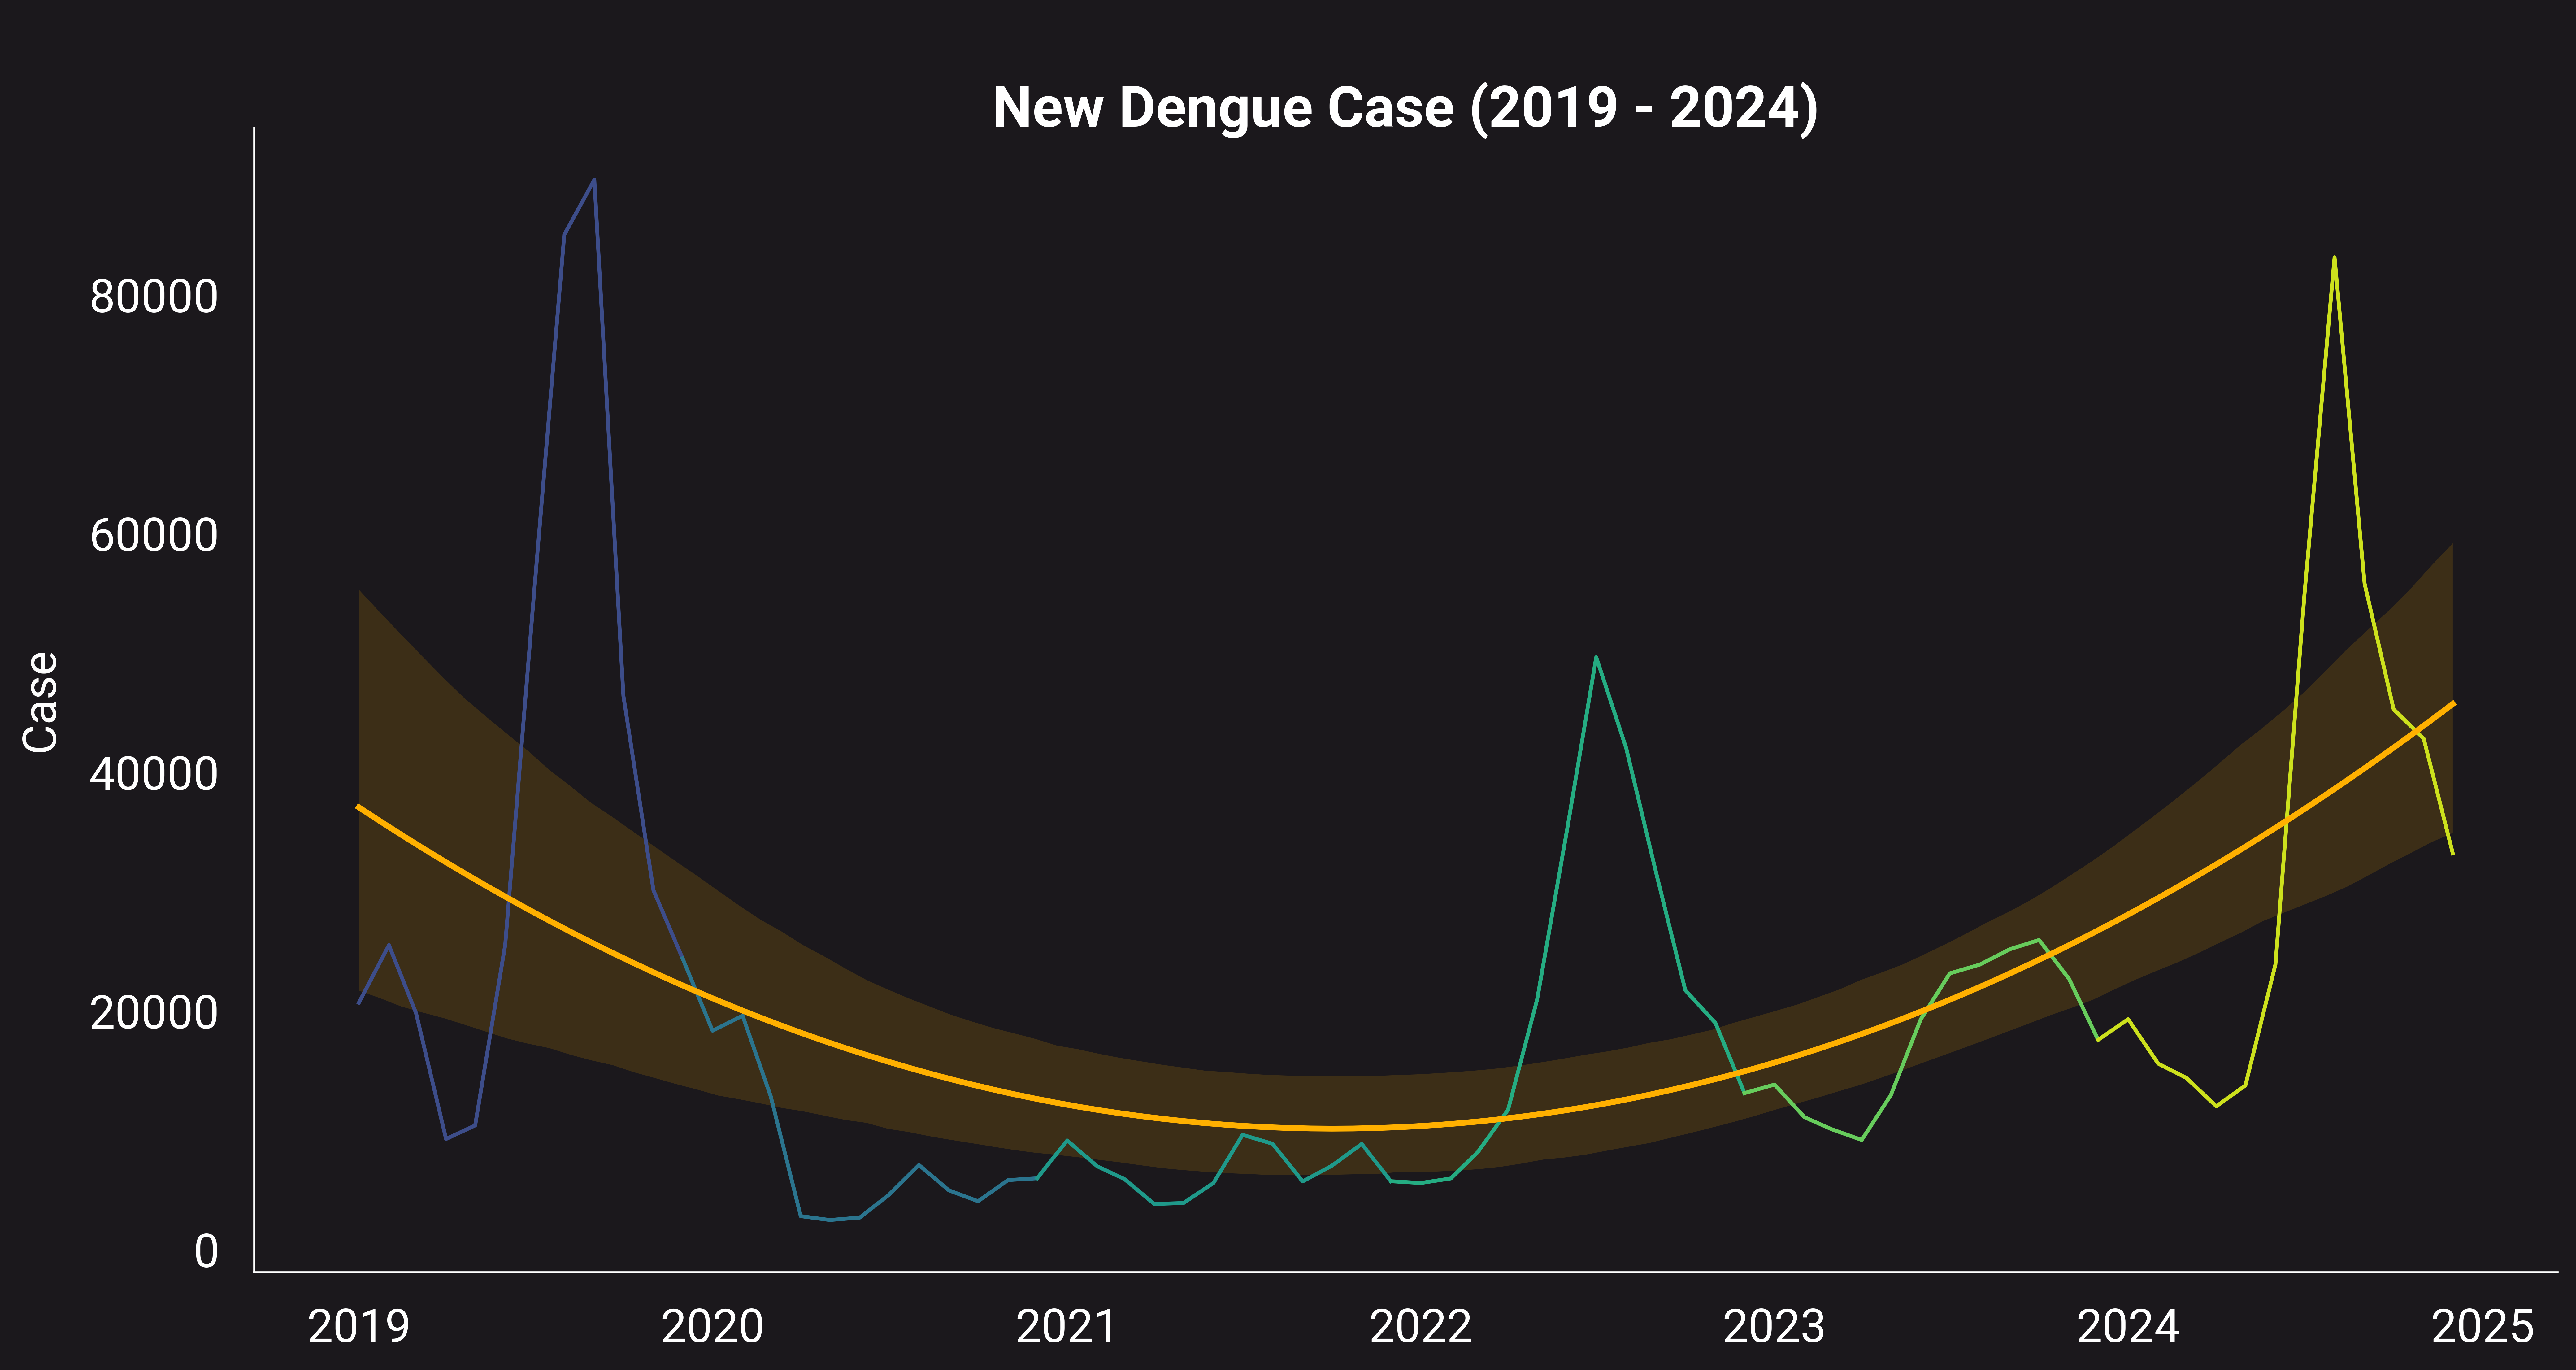

<Figure size 1920x1080 with 0 Axes>

In [11]:

path = "/content/DDPandemic.csv"
df = pd.read_csv(path)

df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

f, ax = plt.subplots(figsize=(16, 8))

# sns.lineplot(data=df, x='date', y='Case', ax=ax, color=colors[0]) # monotone plot

# Plot Monthly data per Year
for c, y in zip(range(df['Year'].nunique()), df['Year'].unique()):
  idx = df.index[df['Year'] == y].tolist()
  if min(idx)-1 > 0: idx.insert(0, min(idx)-1)
  df_y = df.iloc[idx]
  sns.lineplot(data=df_y, x='date', y='Case',
               ax=ax, color=colors_grad[round(c*1.8)+2], legend=False)


# Plot regression line
df['date_reg'] = mpl.dates.date2num(df['date']) # regplot does not work with timestamps
sns.regplot(data=df, x='date_reg', y='Case', order=2,
            ax=ax, scatter=False, color=colors[4])


# Add titles, labels, and legends
ax.set(xlabel=None, ylabel='Case')
ax.set_title('\nNew Dengue Case (2019 - 2024)', pad=0.5, y= 1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.figure(figsize=[19.20,10.80],dpi=100)



plt.show()
